# Part 1 Data Exploration and Data Cleaning

## Load training dataset and use basic statistics to explore data

In [1]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv("train.csv") #Reading data csv file
data.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [3]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
data.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


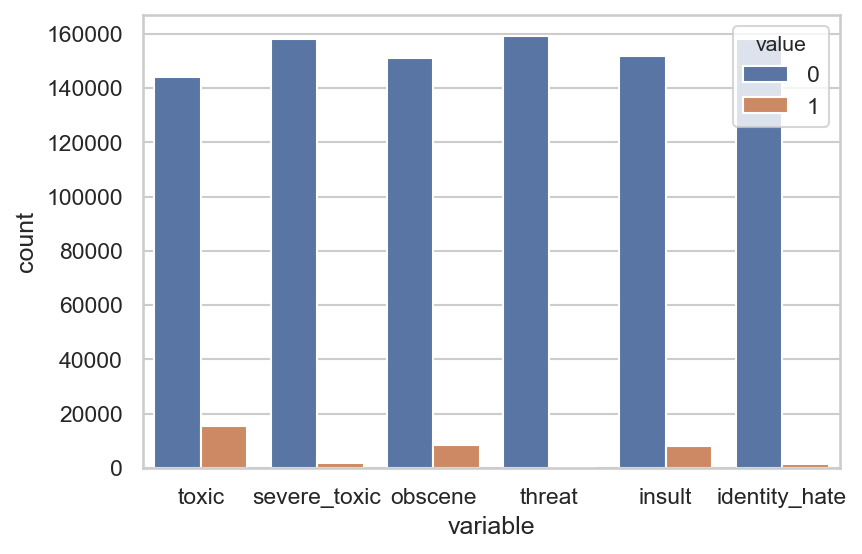

In [6]:
plt.rcParams['figure.dpi']= 150
sns.set(style="whitegrid")
ax = sns.countplot(x="variable", hue="value", data=pd.melt(data.loc[:, "toxic":"identity_hate"]))

In [7]:
categories = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
toxic_comment_counts = [data[category].sum() for category in categories]
toxic_comment_counts = pd.DataFrame(np.array(toxic_comment_counts).reshape(1, 6), columns=categories)
toxic_comment_counts

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,15294,1595,8449,478,7877,1405


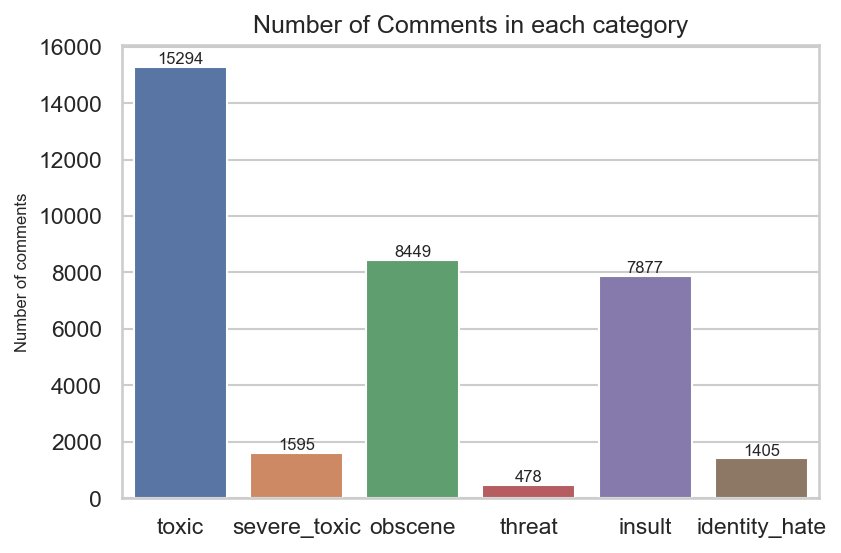

In [8]:
ax = sns.barplot(data=toxic_comment_counts)
pats = ax.patches
plt.title("Number of Comments in each category", fontsize=12)
plt.ylabel('Number of comments', fontsize=8)
for pat, value in zip(pats, toxic_comment_counts.values[0]):
    height = pat.get_height()
    ax.text(pat.get_x() + pat.get_width()/2, height + 5, value, ha='center', va='bottom', fontsize=8)
plt.show()

In [9]:
comment_length = data["comment_text"].apply(lambda x: len(x))

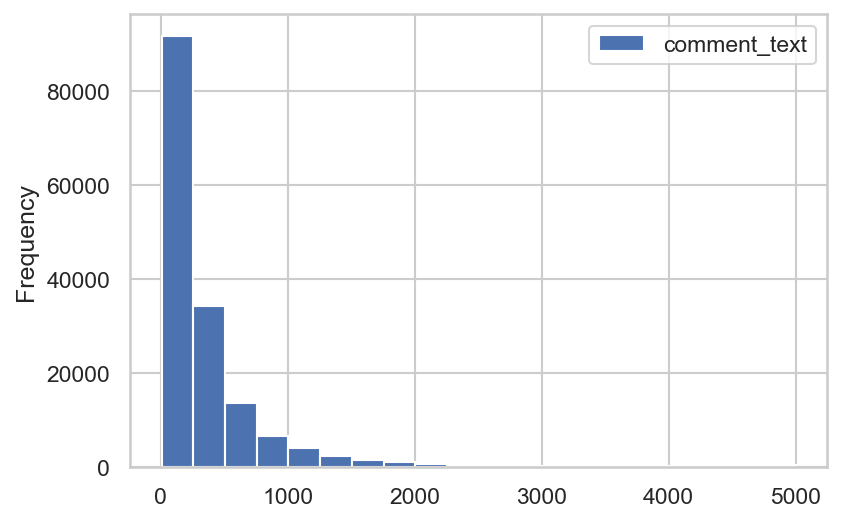

In [29]:
ax = pd.DataFrame(comment_length).plot.hist(bins=20)

In [22]:
comment_word_length = data["comment_text"].apply(lambda x: len(x.split()))

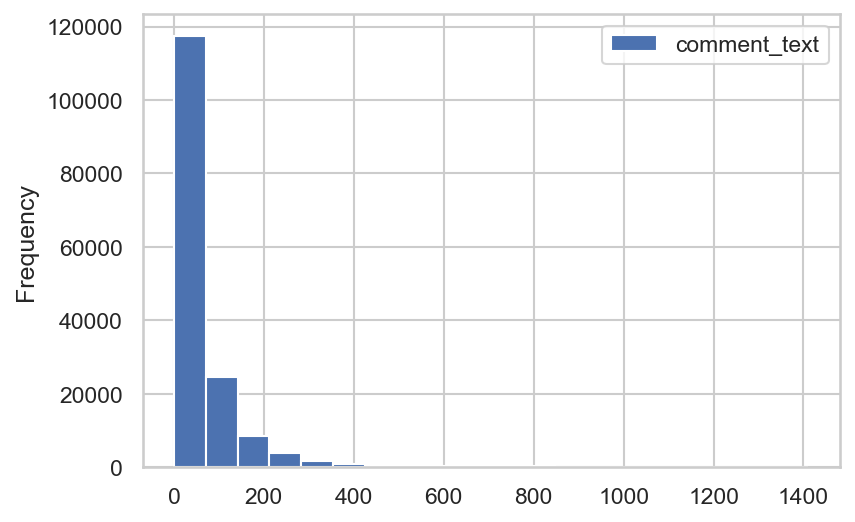

In [28]:
ax = pd.DataFrame(comment_word_length).plot.hist(bins=20)

In [3]:
corr = data.loc[:, "toxic":"identity_hate"].corr()
corr

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


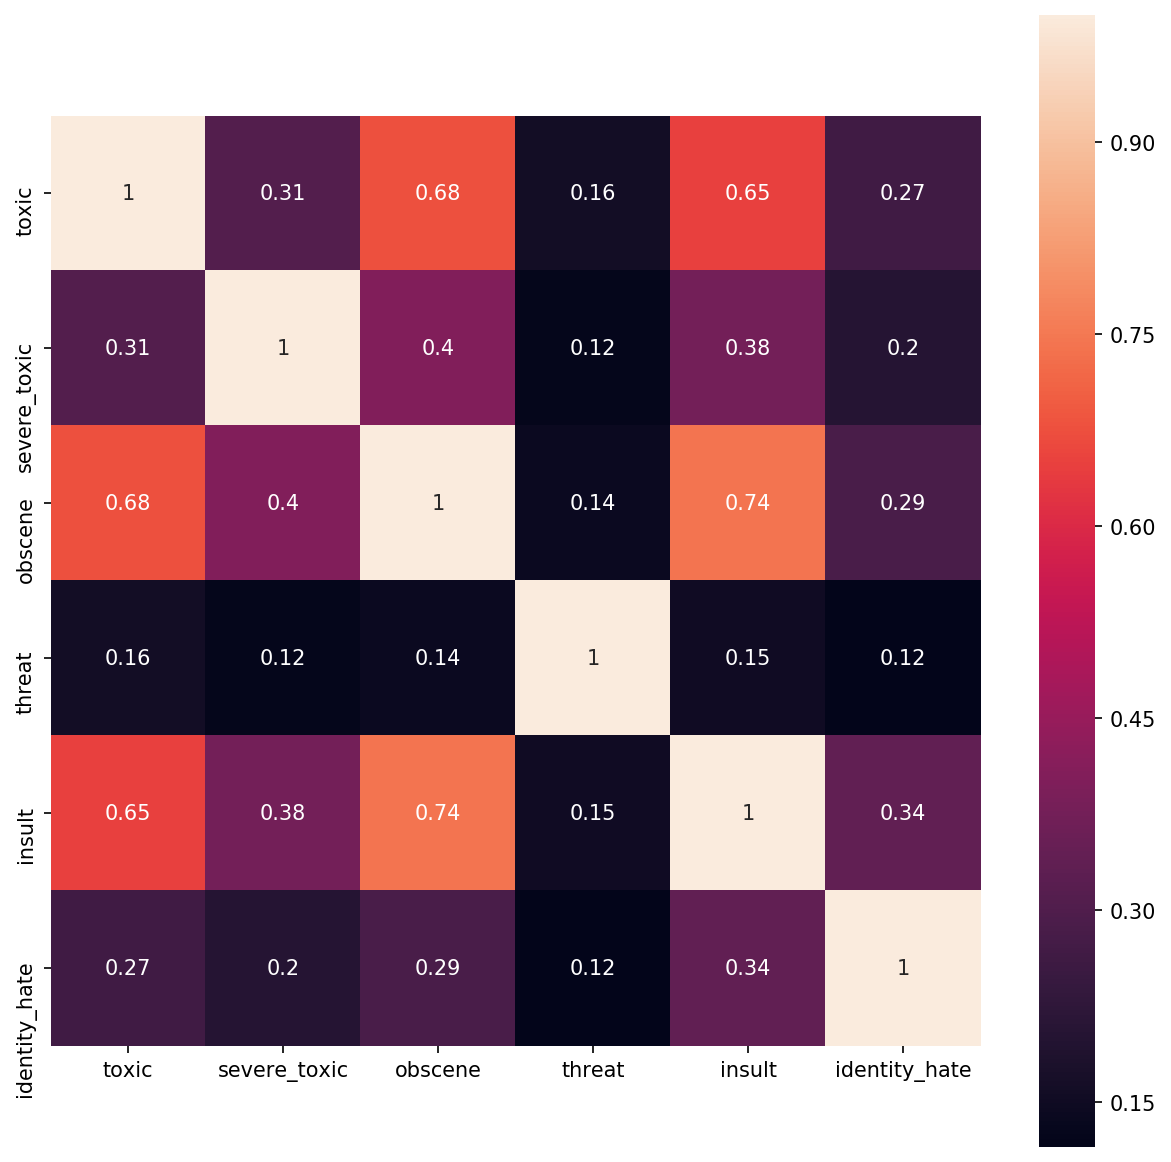

In [4]:
plt.rcParams['figure.dpi']= 150
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(corr, annot=True, square=True, robust=True)

## Data Cleaning

In the data cleaning process, we try to remove meaningless css tags from comments, convert text into lower case letters, remove chracters other than english characters and correct spelling using "symspellpy" package. This process takes a really long time, because we need 1-2 seconds to process one comment, so that we need more than 24 hours to perform the data cleaning process. So that we need to split the data into multiple chunks to process some chunks per person in the group to parallel the process.

In [ ]:
from symspellpy.symspellpy import SymSpell, Verbosity
import re

# define maximum edit distance
max_edit_distance_dictionary = 2
max_edit_distance_lookup = 2
prefix_length = 7

# create symspell object
sym_spell = SymSpell(max_edit_distance_dictionary, prefix_length)

# load the dictionary from path
dictionary_path = "frequency_dictionary_en_82_765.txt"

# define the index of the first column which represent words
term_index = 0

# define the index of the second column which represent frequency
count_index = 1


if not sym_spell.load_dictionary(dictionary_path, term_index, count_index):
    raise ValueError("Dictionary file not found")

    
counts = 0

def deep_clean(text):
    global counts
    
    # save original text for further correction
    original = text
    
    # convert string to lower case
    text = text.lower()
           
    # remove css tags
    text = re.sub(r"#([0-9a-fA-F]{6}|[0-9a-fA-F]{3})", " ",text)
        
    # remove all characters expcept english characters and "-", "'" and """
    text = re.sub(r"[^a-zA-Z \-'\"]", " ", text)
        
    # remove multiple spaces and line breaks
    text = " ".join(text.split())
    
    # correct spelling
    suggestion = sym_spell.lookup_compound(text, max_edit_distance_lookup)
    
    # return corrected sentence
    text = suggestion[0].term
    
    # If the sentence contains characters other than english words,
    # remove special chracter and split them one by one then join them
    # with space.
    if len(text) == 0:
        text = " ".join(list(re.sub('\W+','', original)))

       
    counts += 1
    if counts < 100:
        print('.', end='')
    else:
        print('.')
        counts = 0
        
    
    return text

In [ ]:
chunkBegin = 0
chunkEnd = 150
inputChunkPath = 'train_file_split/'
inputChunkName = 'train_chunk'
outputChunkPath = 'train_clean/'
outputChunkName = 'train_chunk_clean'

for i in range(chunkBegin, chunkEnd, 1):
    inputFileName = inputChunkPath + inputChunkName + "_" + str(i) + ".csv"
    outputFileName = outputChunkPath + outputChunkName + "_" + str(i) + ".csv"
    print('Processing input file {}'.format(inputFileName))
    chunk = pd.read_csv(inputFileName)
    chunk["comment_text"] = chunk["comment_text"].apply(lambda x: deep_clean(x))
    chunk.to_csv(outputFileName, index=False)
    print(' ')
    print('Output file to {}'.format(outputFileName))
    print(' ')

In [ ]:
chunkBegin = 0
chunkEnd = 150
inputChunkPath = 'test_file_split/'
inputChunkName = 'test_chunk'
outputChunkPath = 'test_clean/'
outputChunkName = 'test_chunk_clean'

for i in range(chunkBegin, chunkEnd, 1):
    inputFileName = inputChunkPath + inputChunkName + "_" + str(i) + ".csv"
    outputFileName = outputChunkPath + outputChunkName + "_" + str(i) + ".csv"
    print('Processing input file {}'.format(inputFileName))
    chunk = pd.read_csv(inputFileName)
    chunk["comment_text"] = chunk["comment_text"].apply(lambda x: deep_clean(x))
    chunk.to_csv(outputFileName, index=False)
    print(' ')
    print('Output file to {}'.format(outputFileName))
    print(' ')

In [42]:
chunkBegin = 1
chunkEnd = 150
inputChunkPath = 'train_clean/'
inputChunkName = 'train_chunk_clean'

train_data_cleaned = pd.read_csv('train_clean/train_chunk_clean_0.csv')

for i in range(chunkBegin, chunkEnd, 1):
    inputFileName = inputChunkPath + inputChunkName + "_" + str(i) + ".csv"
    print('Processing input file {}'.format(inputFileName))
    chunk = pd.read_csv(inputFileName)
    train_data_cleaned = pd.concat([train_data_cleaned, chunk], axis=0)
    print(' ')


Processing input file train_clean/train_chunk_clean_1.csv
 
Processing input file train_clean/train_chunk_clean_2.csv
 
Processing input file train_clean/train_chunk_clean_3.csv
 
Processing input file train_clean/train_chunk_clean_4.csv
 
Processing input file train_clean/train_chunk_clean_5.csv
 
Processing input file train_clean/train_chunk_clean_6.csv
 
Processing input file train_clean/train_chunk_clean_7.csv
 
Processing input file train_clean/train_chunk_clean_8.csv
 
Processing input file train_clean/train_chunk_clean_9.csv
 
Processing input file train_clean/train_chunk_clean_10.csv
 
Processing input file train_clean/train_chunk_clean_11.csv
 
Processing input file train_clean/train_chunk_clean_12.csv
 
Processing input file train_clean/train_chunk_clean_13.csv
 
Processing input file train_clean/train_chunk_clean_14.csv
 
Processing input file train_clean/train_chunk_clean_15.csv
 
Processing input file train_clean/train_chunk_clean_16.csv
 
Processing input file train_clean

 
Processing input file train_clean/train_chunk_clean_141.csv
 
Processing input file train_clean/train_chunk_clean_142.csv
 
Processing input file train_clean/train_chunk_clean_143.csv
 
Processing input file train_clean/train_chunk_clean_144.csv
 
Processing input file train_clean/train_chunk_clean_145.csv
 
Processing input file train_clean/train_chunk_clean_146.csv
 
Processing input file train_clean/train_chunk_clean_147.csv
 
Processing input file train_clean/train_chunk_clean_148.csv
 
Processing input file train_clean/train_chunk_clean_149.csv
 


In [47]:
train_data_cleaned = train_data_cleaned.drop(['Unnamed: 0'], axis=1)
train_data_cleaned.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,draw he matches this background colour i'm see...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i'm really not trying to edit war its ...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can't make any real suggestions on impr...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [48]:
train_data_cleaned.to_csv('cleaned_train_data', index=False)

In [49]:
chunkBegin = 1
chunkEnd = 150
inputChunkPath = 'test_clean/'
inputChunkName = 'test_chunk_clean'

test_data_cleaned = pd.read_csv('test_clean/test_chunk_clean_0.csv')

for i in range(chunkBegin, chunkEnd, 1):
    inputFileName = inputChunkPath + inputChunkName + "_" + str(i) + ".csv"
    print('Processing input file {}'.format(inputFileName))
    chunk = pd.read_csv(inputFileName)
    test_data_cleaned = pd.concat([test_data_cleaned, chunk], axis=0)
    print(' ')


Processing input file test_clean/test_chunk_clean_1.csv
 
Processing input file test_clean/test_chunk_clean_2.csv
 
Processing input file test_clean/test_chunk_clean_3.csv
 
Processing input file test_clean/test_chunk_clean_4.csv
 
Processing input file test_clean/test_chunk_clean_5.csv
 
Processing input file test_clean/test_chunk_clean_6.csv
 
Processing input file test_clean/test_chunk_clean_7.csv
 
Processing input file test_clean/test_chunk_clean_8.csv
 
Processing input file test_clean/test_chunk_clean_9.csv
 
Processing input file test_clean/test_chunk_clean_10.csv
 
Processing input file test_clean/test_chunk_clean_11.csv
 
Processing input file test_clean/test_chunk_clean_12.csv
 
Processing input file test_clean/test_chunk_clean_13.csv
 
Processing input file test_clean/test_chunk_clean_14.csv
 
Processing input file test_clean/test_chunk_clean_15.csv
 
Processing input file test_clean/test_chunk_clean_16.csv
 
Processing input file test_clean/test_chunk_clean_17.csv
 
Proces

In [50]:
test_data_cleaned = test_data_cleaned.drop(['Unnamed: 0'], axis=1)
test_data_cleaned.head()

,id,comment_text
0,00001cee341fdb12,to bitch a rule is more successful then you al...
1,0000247867823ef7,from rec the title is fine as it is limo
2,00013b17ad220c46,sources awe ashton on lapland
3,00017563c3f7919a,if you have a look back at the source the info...
4,00017695ad8997eb,i don't anonymously edit articles at all


In [51]:
test_data_cleaned.to_csv('cleaned_test_data.csv', index=False)

In [29]:
cleaned_data = pd.read_csv('cleaned_train_data.csv')

In [30]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [31]:
comment_length = cleaned_data["comment_text"].apply(lambda x: len(str(x)))

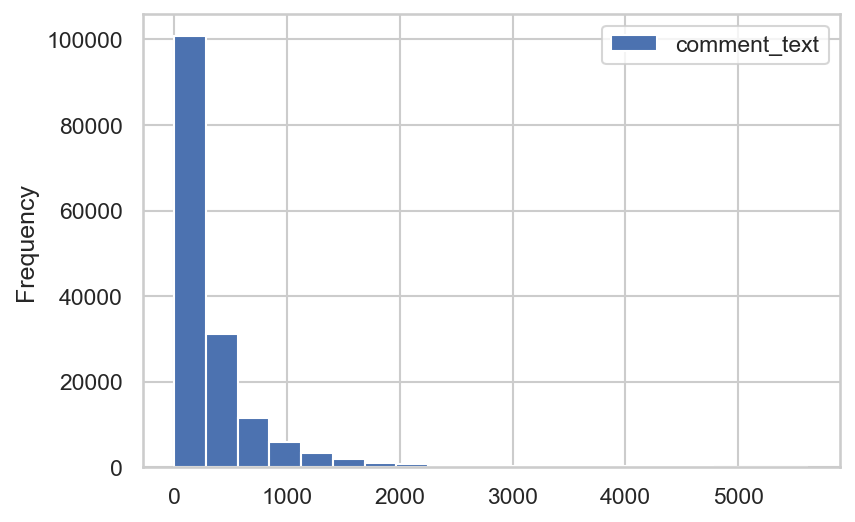

In [32]:
plt.rcParams['figure.dpi']= 150
sns.set(style="whitegrid")
ax = pd.DataFrame(comment_length).plot.hist(bins=20)

In [33]:
comment_word_length = cleaned_data["comment_text"].apply(lambda x: len(str(x).split()))

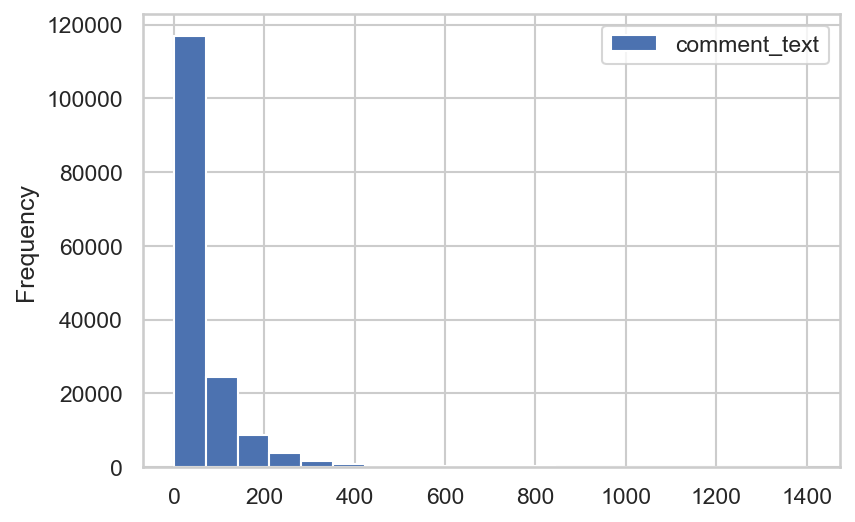

In [34]:
ax = pd.DataFrame(comment_word_length).plot.hist(bins=20)